In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Import the Dataset
df = pd.read_csv(r"C:\Users\Zahid.Shaikh\100days\60\Mall_Customers.csv",header=0)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape ### Checking Shape

(200, 5)

In [4]:
df.describe() ### Get information of the Dataset

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns ### Checking Columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum() ### Checking Null Values in the Data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df1 = pd.DataFrame.copy(df)
df1.shape

(200, 5)

In [9]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'CustomerID': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 17

In [10]:
### Finding numerical variables
colname_num = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(colname_num)))
print('The numerical variables are :', colname_num)

There are 4 numerical variables

The numerical variables are : ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [11]:
### Finding categorical variables
colname_cat = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(colname_cat)))
print('The categorical variables are :', colname_cat)

There are 1 categorical variables

The categorical variables are : ['Gender']


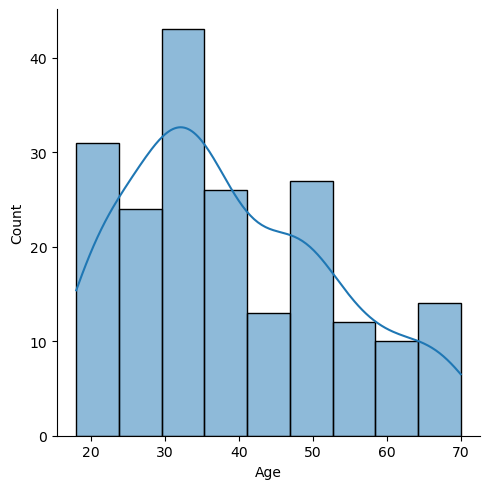

In [12]:
### Distribution of age
sns.displot(x='Age', data=df1, kde=True)

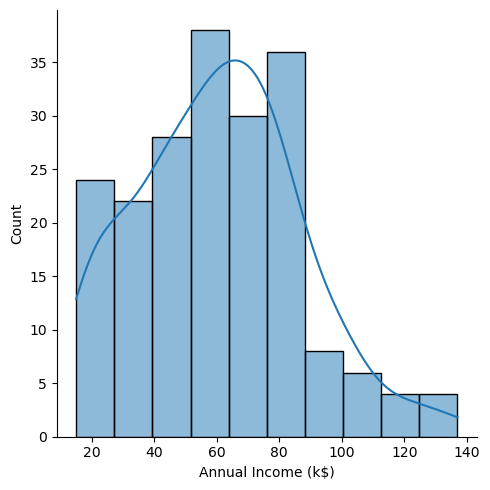

In [13]:
### Distribution of income
sns.displot(x='Annual Income (k$)', data=df1, kde=True)

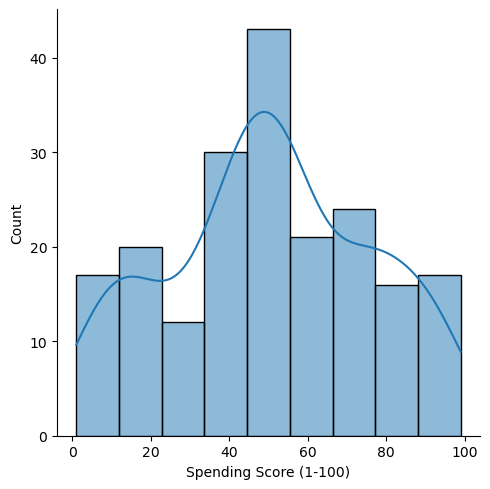

In [14]:
### Distribution of score
sns.displot(x='Spending Score (1-100)', data=df1, kde=True)

Gender
Female    112
Male       88
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

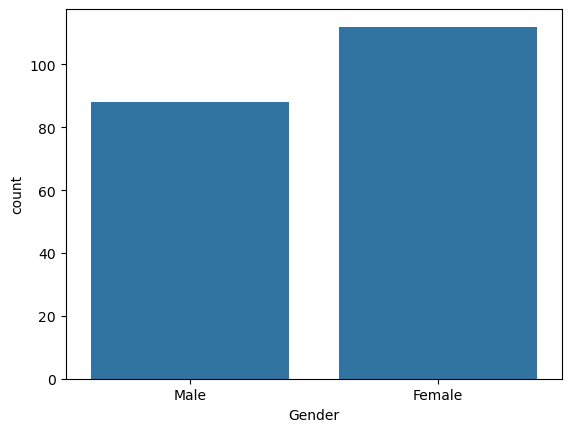

In [15]:
# distribution of categorical variable
print(df1['Gender'].value_counts())
sns.countplot(x='Gender', data=df1)

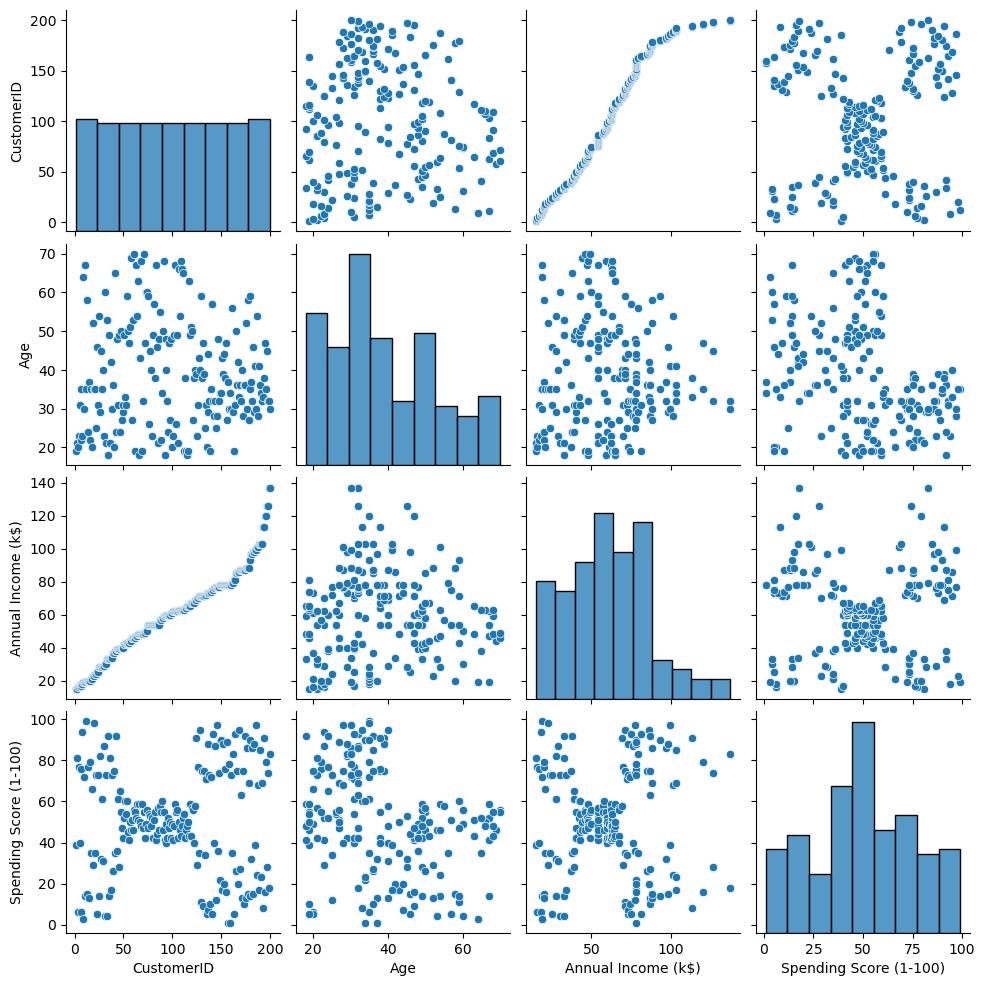

In [16]:
# Creates pairwise scatter plots for all features in the dataframe 'df1'.
sns.pairplot(df1)

In [17]:
df2 = df1.copy()
df2.shape

(200, 5)

In [18]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X = df2.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

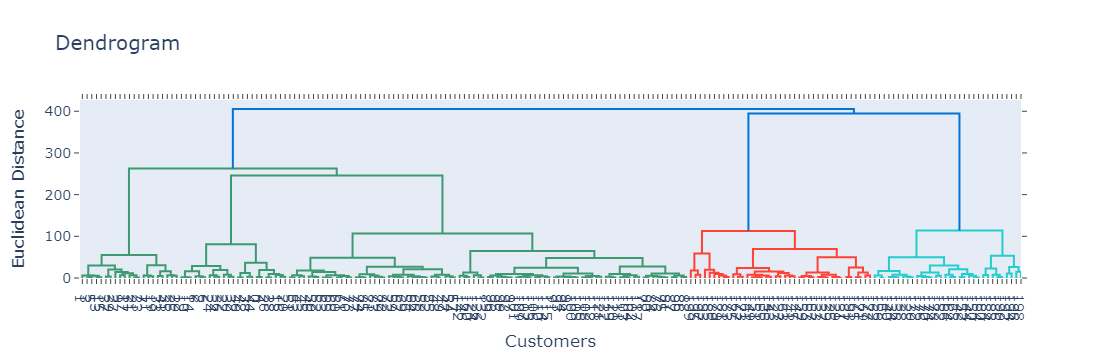

In [51]:
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as sch
import numpy as np

# Perform hierarchical clustering and create the linkage matrix
linkage_matrix = sch.linkage(X, method='ward')

# Create a dendrogram
fig = ff.create_dendrogram(X, linkagefun=lambda x: linkage_matrix)

# Set the title and axis labels
fig.update_layout(
    title='Dendrogram',
    xaxis_title='Customers',
    yaxis_title='Euclidean Distance',
    font=dict(size=14)
)

# Show the figure
fig.show()


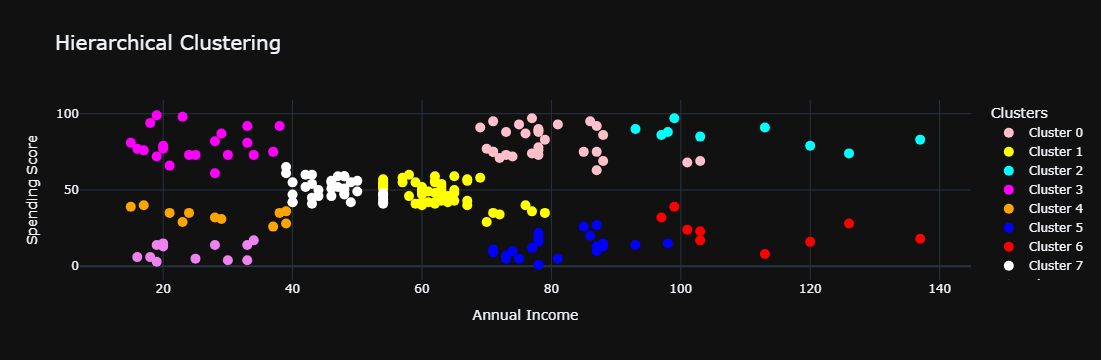

In [59]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=9, linkage='ward')
y_hc = hc.fit_predict(X)

# Create a scatter plot using Plotly
fig = go.Figure()

# Define colors for each cluster
colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange', 'blue', 'red', 'white', 'violet']

# Loop through each cluster to add scatter points
for i in range(9):
    fig.add_trace(go.Scatter(
        x=X[y_hc == i, 0],  # X coordinates for cluster i
        y=X[y_hc == i, 1],  # Y coordinates for cluster i
        mode='markers',
        marker=dict(size=10, color=colors[i]),  # Marker size and color
        name=f'Cluster {i}'  # Legend label for the cluster
    ))

# Update layout for dark theme
fig.update_layout(
    title='Hierarchical Clustering',
    title_font=dict(size=20),
    xaxis_title='Annual Income',
    yaxis_title='Spending Score',
    legend_title_text='Clusters',
    template='plotly_dark',  # Set dark theme
    hovermode='closest'  # Enable hover for better interactivity
)

# Show the figure
fig.show()

##### <center> Made with ❤️ by Zahid Salim Shaikh</center>